In [5]:
'''
Author: Jun Dai
'''

'\nAuthor: Jun Dai\n'

<h1><center> A/B testing </center></h1>

A/B testing, also refers to split testing, refers to an experiment technique to determine whether a new design brings improvement, according to a chosen metric.

<img src="https://cdn.ttgtmedia.com/rms/onlineimages/mobile_computing-ab_testing.png">

image source: https://cdn.ttgtmedia.com/rms/onlineimages/mobile_computing-ab_testing.png




<img src='http://delaneyknight.files.wordpress.com/2014/04/a-b-testing.jpg'>
image source: http://delaneyknight.files.wordpress.com/2014/04/a-b-testing.jpg

## 40.6% increase conversion rate and 57 million fundraising funds.

<img src='https://i.vimeocdn.com/video/707769762_1280x720.jpg'>
image source: https://i.vimeocdn.com/video/707769762_1280x720.jpg


<h1><center>How to Conduct A/B Testing?</center></h1>

#### 1. Customer funnel; funnel analysis for each action step; netflix example

#### 2. Define metrics 
Target increase rate: click through rate, registration rate, conversion rate, renewal rate, retention rate, etc.
#### 3. Form hypothesis
Hypothesis test, Null hypothesis
#### 4. Formulate Test plan
Make a plan to define "good"


#### 5. Create variation
direct compare a variation against a current experiene, including data collection in this step.
#### 6. Run experiment
choose significance level, statistical power, pratical significance level
#### 7. Analyse test result
sanity check, single metric evaluation and cross checking with different methods
#### 8. Conclusion
do you want to launch the change? does it worth to?

### Practical Significance


<img src='https://qph.fs.quoracdn.net/main-qimg-c1881cfe2fa79a744e496a5850fceed0.webp'>

#### Type-I error
 
#### Type-II error

#### statistical power (sensitivity 1-$\beta$)

With a common go-to $\alpha$ criterion of 5%, we have pvalue$<\alpha$ and $H_0$ can be rejected with confidence.

Q: When shall we use other $\alpha$ values? Under what kind of circumenstances?


## Raw Data

<img src='https://cdn0.tnwcdn.com/wp-content/blogs.dir/1/files/2015/07/ABtesting-1200x600.png'>

|version  | #sessions | avg. time | std. time | con. ratio
|---|---|---|---|---
|A | 6000 | 60 | 40 | 1.5%
|B | 4000 | 62 | 45 | 2.0%


## $Z$ test on average time  (Q: Z-test vs T-test?)

### Why the following formula

$Z = \frac{\mu_A - \mu_B}{\sqrt{{\sigma_A^2}/{n_A}+{\sigma_B^2}/{n_B}}}$   ## Note: this is for unequal variance Z-test


### Hypothesises

$H_0$: the average time spent is the same for the two versions

$H_1$: the average time spent is higher for version B

In [1]:
import numpy as np
import scipy
from scipy.stats import norm, chi2

In [2]:
## Z test on time, the average time differs, and variances are not close, use the unequal Z-test

mu_A = 60
mu_B = 62
var_A = 40**2
var_B = 45**2
n_A =6000
n_B =4000
Z = (mu_B-mu_A)/(np.sqrt(var_A/n_A+var_B/n_B))
print('Z value is: {:.4f}\np-value is: {:.4f}'.format(Z, norm.sf(Z)))



Z value is: 2.2749
p-value is: 0.0115


p-value smaller than 5%, rejected the $H_0$

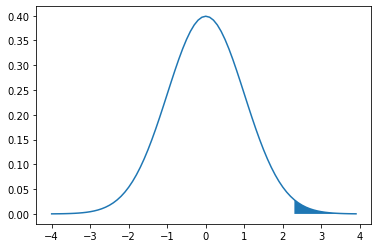

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

z = np.arange(-4, 4, 0.1)
plt.plot(z, norm.pdf(z))
plt.fill_between(z[z>Z], norm.pdf(z[z>Z]))
#plt.show()

## $\chi^2$ Test on conversion rate

### Hypothesises:
$H_0$: ''the conversion rate is the same for the two versions''

$H_1$: ''the conversion rate is higher for version B''

$\textbf{Q: Why shall we use $\chi^2$ test here, instead of $Z-$test? }$

|type|converted|not converted|
|---|---|---|
|A|90|5910|
|B|80|3920|

The averaged converted ratio: (90+80)/10000=0.017

chi value is: 3.5904
p-value is: 0.0581


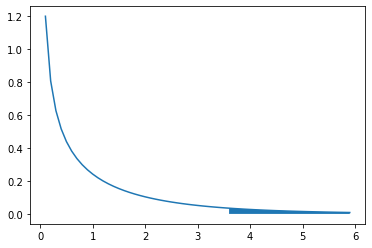

In [4]:
## typical chi suqred distribution
O_x = np.array([90, 5910, 80, 3920])
T_x = np.array([102, 5898, 68, 3932])
chi = np.sum(np.square(O_x-T_x)/T_x)
print('chi value is: {:.4f}\np-value is: {:.4f}'.format(chi, chi2.sf(chi, df=1)))

X  = np.arange(0,6,0.1)
y = chi2.pdf(X, df=1)
#plt.ylim(0,0.4)
plt.plot(X, y)
plt.fill_between(X[X>chi], chi2.pdf(X[X>chi], df=1))

p-value larger than 5%, which indicates $H_0$ should be kept

<h1><center>
Open Question: Talk about how will you sketch up an A/B testing regarding halloween for Walmart?
</center></h1>

## A/B testing v.s. Machine Learning

1. A/B testing tells you the best of two
2. ML: much more (thousands of) variations feed into the system as data, requires more data and more complex design
3. Which one to go, dependes on whether you have the data, and how much test you want to invest
4. RNN could possibly be able to optimize a website/design in real time, requires high traffic
5. A/B testing, 1 variable vs. multi variables in ML
6. A/B human analysis, ML automated